In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt
import os

# Define directories
data_dir = 'C:/Users/gusta/Desktop/Data'

In [ ]:
# Load pre-trained MobileNetV2 model + higher level layers
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Add new top layers
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(5, activation='softmax')(x)

# This is the model we will train
model = Model(inputs=base_model.input, outputs=predictions)

# Freeze the layers of the base model
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Data augmentation and rescaling
train_datagen = ImageDataGenerator(rescale=1.0/255, validation_split=0.2)

train_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='training')

validation_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation')

Found 3561 images belonging to 5 classes.
Found 888 images belonging to 5 classes.


In [ ]:
# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    epochs=10)

Epoch 1/10
111/111 [==============================] - 75s 618ms/step - loss: 0.4511 - accuracy: 0.8541 - val_loss: 0.2998 - val_accuracy: 0.9016
Epoch 2/10
111/111 [==============================] - 28s 255ms/step - loss: 0.1875 - accuracy: 0.9382 - val_loss: 0.2485 - val_accuracy: 0.9236
Epoch 3/10
111/111 [==============================] - 29s 261ms/step - loss: 0.0957 - accuracy: 0.9685 - val_loss: 0.2555 - val_accuracy: 0.9259
Epoch 4/10
111/111 [==============================] - 28s 254ms/step - loss: 0.0746 - accuracy: 0.9793 - val_loss: 0.3055 - val_accuracy: 0.9178
Epoch 5/10
111/111 [==============================] - 30s 272ms/step - loss: 0.0334 - accuracy: 0.9930 - val_loss: 0.2671 - val_accuracy: 0.9387
Epoch 6/10
111/111 [==============================] - 29s 257ms/step - loss: 0.0103 - accuracy: 0.9989 - val_loss: 0.2868 - val_accuracy: 0.9363
Epoch 7/10
111/111 [==============================] - 30s 267ms/step - loss: 0.0035 - accuracy: 1.0000 - val_loss: 0.2698 - val_ac

In [ ]:
# Evaluate the model
validation_loss, validation_accuracy = model.evaluate(validation_generator)
print(f'Validation accuracy: {validation_accuracy*100:.2f}%')

28/28 [==============================] - 5s 177ms/step - loss: 0.3060 - accuracy: 0.9358
Validation accuracy: 93.58%


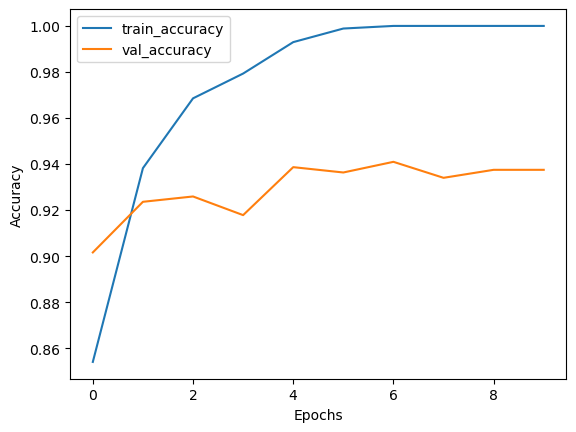

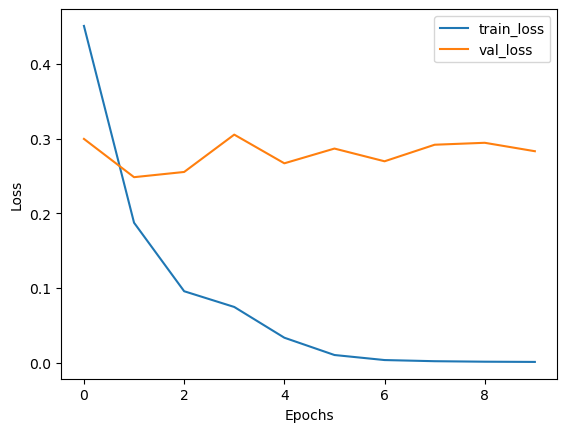

In [ ]:
# Plot accuracy and loss over epochs
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
model.save('insect_classifier_model.h5')

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import random
from tensorflow.keras.preprocessing.image import img_to_array, load_img

# Get the class labels from the training generator
class_labels = list(train_generator.class_indices.keys())

In [ ]:
# Information about the insects

insect_info = {
    'Butterfly': {
        'dangerous': 'No',
        'regions': 'Worldwide, especially in gardens and meadows',
        'protection': 'No specific protection needed',
        'fun_fact': 'Butterflies taste with their feet!'
    },
    'Dragonfly': {
        'dangerous': 'No',
        'regions': 'Near water bodies like ponds, lakes, and rivers',
        'protection': 'No specific protection needed',
        'fun_fact': 'Dragonflies have been on Earth for over 300 million years.'
    },
    'Grasshopper': {
        'dangerous': 'No',
        'regions': 'Grasslands and fields worldwide',
        'protection': 'No specific protection needed',
        'fun_fact': 'Grasshoppers can jump up to 20 times their body length.'
    },
    'Ladybird': {
        'dangerous': 'No',
        'regions': 'Gardens, forests, and grasslands worldwide',
        'protection': 'No specific protection needed',
        'fun_fact': 'A single ladybird can eat up to 5,000 aphids in its lifetime.'
    },
    'Mosquito': {
        'dangerous': 'Yes',
        'regions': 'Worldwide, especially in warm and humid climates',
        'protection': 'Use insect repellent, wear long sleeves, and use mosquito nets',
        'fun_fact': 'Only female mosquitoes bite as they need blood to produce eggs.'
    }
}


In [ ]:
# Define a function to predict the class of an image
def predict_image(image_path):

    # Load and preprocess the image
    img = load_img(image_path, target_size=(224, 224))
    img_array = img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    # Predict the class of the image
    prediction = model.predict(img_array)
    predicted_class = class_labels[np.argmax(prediction)]
    confidence = np.max(prediction) * 100
    info = insect_info.get(predicted_class, {})

    return predicted_class, confidence, info

# Gather all image paths from the validation set
validation_image_paths = []
for subdir, dirs, files in os.walk(data_dir):
    for file in files:
        if file.lower().endswith(('.png', '.jpg', '.jpeg')):
            validation_image_paths.append(os.path.join(subdir, file))

In [ ]:
# Randomly select 10 images from the validation set for visualization
random_images = random.sample(validation_image_paths, 10)

1/1 [==============================] - 0s 31ms/step


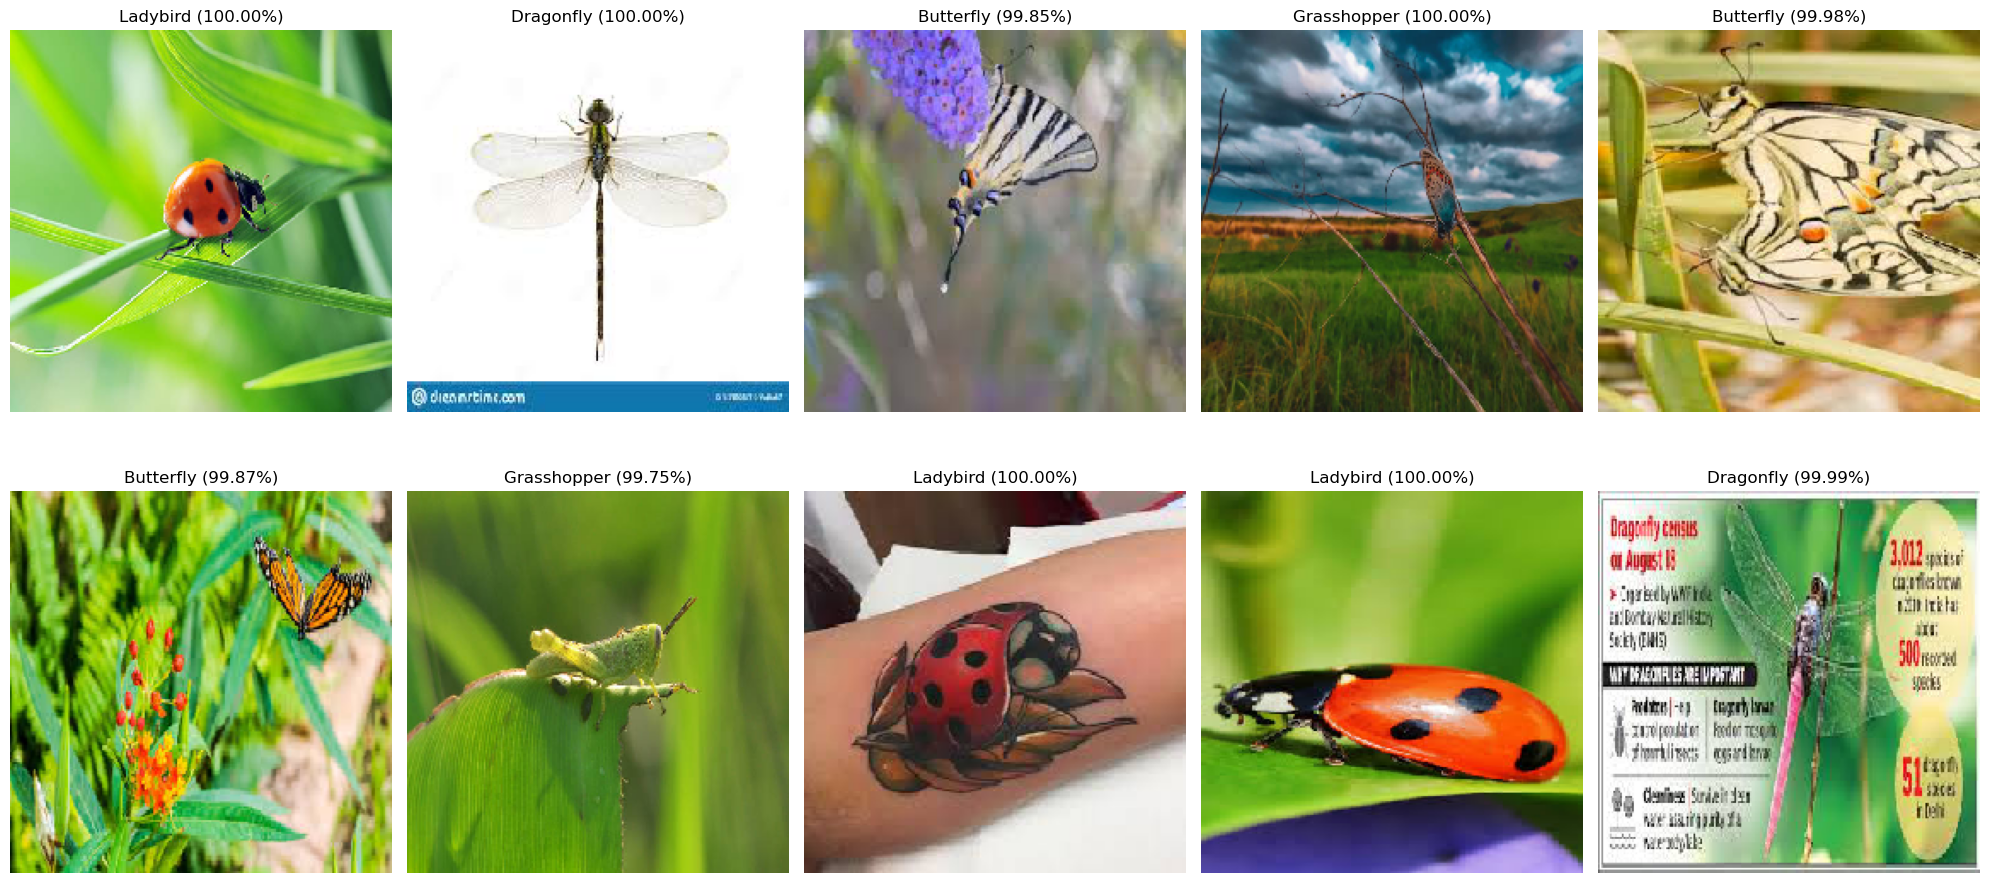

In [ ]:
# Plot the selected images with their predicted classes
plt.figure(figsize=(20, 10))
for i, img_path in enumerate(random_images):
    plt.subplot(2, 5, i + 1)
    img = load_img(img_path, target_size=(224, 224))
    plt.imshow(img)
    predicted_class, confidence, _ = predict_image(img_path)
    title = f"{predicted_class} ({confidence:.2f}%)"
    plt.title(title)
    plt.axis('off')
plt.tight_layout()
plt.show()

In [ ]:
# Function to predict a single image from a specified path
def predict_single_image(image_path):
    img = load_img(image_path, target_size=(224, 224))
    plt.imshow(img)
    predicted_class, confidence, info = predict_image(image_path)
    title = f"{predicted_class} ({confidence:.2f}%)\n"
    title += f"Dangerous: {info.get('dangerous', 'N/A')}\n"
    title += f"Regions: {info.get('regions', 'N/A')}\n"
    title += f"Protection: {info.get('protection', 'N/A')}\n"
    title += f"Fun Fact: {info.get('fun_fact', 'N/A')}\n"
    plt.title(title)
    plt.axis('off')
    plt.show()

1/1 [==============================] - 0s 16ms/step


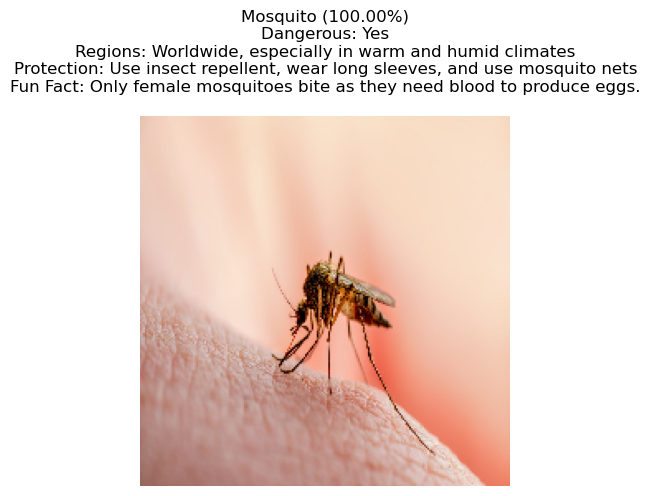

In [ ]:
#Example 1
image_path = "C:/Users/gusta/Desktop/qHFk9kpTURBXy9jMjM0OTZlODQwZTBlMTdkMjE1ZWM1NGE1YTNiMWZlZS5qcGeSlQMAzQHrzRNAzQrVkwXNBLDNAoXeAAGhMAE.jpg"
predict_single_image(image_path)

1/1 [==============================] - 0s 33ms/step


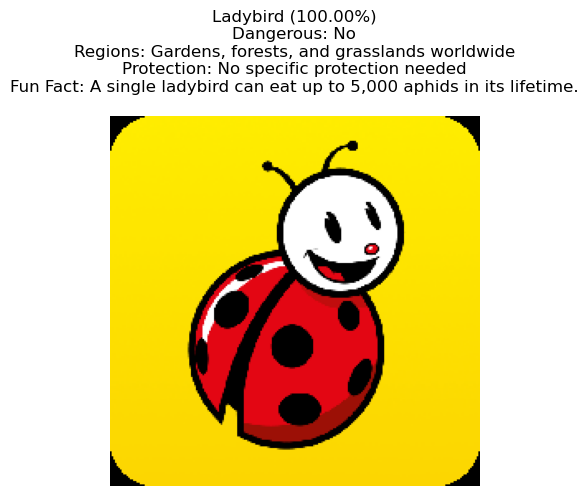

In [ ]:
#Example 2
image_path = "C:/Users/gusta/Desktop/unnamed.png"
predict_single_image(image_path)